In [118]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [119]:
encounters= pd.read_excel('encounters.xlsx')
patients= pd.read_excel('patients.xlsx')
payers= pd.read_excel('payers.xlsx')
procedures= pd.read_excel('procedures.xlsx')


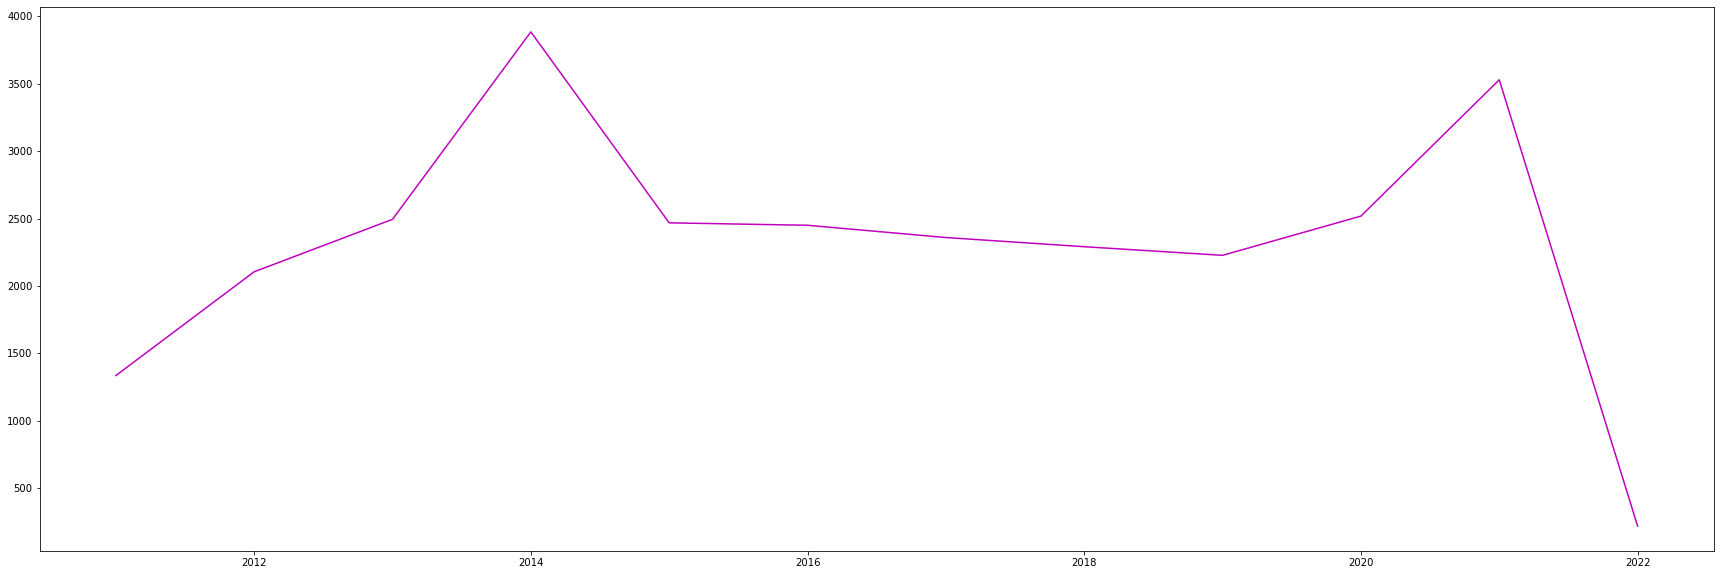

In [120]:
#Total number of patients over years
encounters['year']= pd.DatetimeIndex(encounters['START']).year

patient= encounters.groupby('year').agg({
     'PATIENT': 'count'}).reset_index().rename(columns={"year":'Year','PATIENT':'Patients'})


date= patient['Year']
Patients= patient['Patients']

plt.figure(figsize=(30, 10))
plt.plot(date, Patients, color='m')
plt.show()

In [121]:
#Number of patients per class 
patient=encounters.groupby('ENCOUNTERCLASS').agg({
     'PATIENT': 'count'}).reset_index().rename(columns={"ENCOUNTERCLASS":'Class','PATIENT':'Patients'})

Patient= patient.sort_values('Patients',ascending= False)
Patient

,Class,Patients
0,ambulatory,12537
3,outpatient,6300
4,urgentcare,3666
1,emergency,2322
5,wellness,1931
2,inpatient,1135


In [122]:
#Average days spent in hospital
day=encounters.groupby('ENCOUNTERCLASS').agg({
     'days': 'mean'}).reset_index().rename(columns={"ENCOUNTERCLASS":'class'})

days= day.sort_values('days',ascending= False)
days

,class,days
2,inpatient,1.535066
0,ambulatory,0.394976
3,outpatient,0.244828
1,emergency,0.064240
5,wellness,0.010417
4,urgentcare,0.010417


In [123]:
#Most expensive patients 
cost=encounters.groupby('PATIENT').agg({
     'TOTAL_CLAIM_COST': 'sum'}).reset_index().rename(columns={"TOTAL_CLAIM_COST":'Total clam cost'})

Cost= cost.sort_values('Total clam cost',ascending= False)
Cost.head(25)

,PATIENT,Total clam cost
245,3f523789-55f3-bb31-2757-4803ca6a9c2a,9932262.99
973,ff331e5c-ab16-e218-f39a-63e11de1ed75,6356665.66
647,a733bbc1-cbdf-992f-f1b7-bd230028fc4f,3014121.02
174,2aa3ac2a-88c6-3253-547d-6d8ed69790a3,2699823.10
85,1712d26d-822d-1e3a-2267-0a9dba31d7c8,2437415.31
900,eda6bc14-b236-e8c6-509a-b293e9cc688b,2090033.12
221,37448778-ee2f-f420-1dc0-cb6b5e147025,1206558.16
970,fea2a30d-f7c9-eeb0-9aad-5c711f55574f,1181185.96
9,0226f105-2572-1c6f-15f0-1aa0438e40d0,1127635.83
70,1375a6a6-5638-8af1-dc4f-2aa58220d36d,1030983.91


In [124]:
#Percentage of patients covered

coverage= encounters['PAYER_COVERAGE']
coverage= coverage.to_list()

get_coverage=[]
for i in range(len(coverage)):
    if coverage[i] == 0:
        get_coverage.append('no')
    else:
        get_coverage.append('yes')
        
encounters['Get_Coverage']= get_coverage

cov= encounters.groupby('Get_Coverage').agg({
     'PATIENT': 'count', }).reset_index().rename(columns={"Get_Coverage":'Get Coverage','PATIENT':'Patient'})

cov_per= cov['Patient']/len(get_coverage)
Cov_Per= cov_per.round(2)
cov['Cov_Per']= Cov_Per
cov

,Get Coverage,Patient,Cov_Per
0,no,13586,0.49
1,yes,14305,0.51


0         no
1        yes
2        yes
3        yes
4         no
        ... 
27886    yes
27887    yes
27888     no
27889     no
27890     no
Name: Get_Coverage, Length: 27891, dtype: object

In [125]:
#The average percentage of the cost covered from the main cost and the total amount of this coverage.

remain_cost = encounters['TOTAL_CLAIM_COST'] - encounters['PAYER_COVERAGE']
encounters['Remain_cost']= remain_cost

Coverage_Percantage= 1- (encounters['Remain_cost'] / encounters['TOTAL_CLAIM_COST']).round(2)
encounters['Coverage_Percantage'] = Coverage_Percantage

per= encounters['Coverage_Percantage'].mean()
value= encounters['PAYER_COVERAGE'].sum()

print(f"Average of Coverage percantage is {round(per,2)} to and total amount of coverage is {value}$")

Average of Coverage percantage is 0.32 to and total amount of coverage is 31097506.99$


In [126]:
#Total numbers for each class and the coverage percentage and total amount for this coverage 

data= encounters[encounters.Coverage_Percantage > 0]
per= data.groupby('ENCOUNTERCLASS').agg({'PATIENT':'count','Coverage_Percantage': 'mean',
   'PAYER_COVERAGE':'sum'}).reset_index().rename(columns={"Coverage_Percantage":'Coverage Percantage',
    'PATIENT':'Patients','PAYER_COVERAGE':'Total Coverage'})

Per= per.sort_values('Patients',ascending= False).round(2)
Per

,ENCOUNTERCLASS,Patients,Coverage Percantage,Total Coverage
0,ambulatory,6019,0.64,12902866.80
3,outpatient,2997,0.56,3777758.01
4,urgentcare,1988,0.59,3058909.73
1,emergency,1559,0.63,3246790.15
5,wellness,1138,0.77,4421749.94
2,inpatient,584,0.75,3688764.95


In [127]:
#Common Diagnosis
reas=encounters.groupby('REASONDESCRIPTION').agg({
     'PATIENT': 'count','Coverage_Percantage':'mean'}).reset_index().rename(
      columns={'REASONDESCRIPTION':'Diagnosis', "PATIENT":'Patient'})

Reas= reas.sort_values('Patient',ascending= False).round(2)
Reas.head(20)

,Diagnosis,Patient,Coverage_Percantage
13,Chronic congestive heart failure (disorder),1738,0.29
34,Hyperlipidemia,1565,0.47
49,Normal pregnancy,1341,0.36
72,Viral sinusitis (disorder),732,0.18
43,Malignant neoplasm of breast (disorder),723,0.43
3,Acute viral pharyngitis (disorder),400,0.23
2,Acute bronchitis (disorder),352,0.33
4,Alzheimer's disease (disorder),191,0.41
66,Sinusitis (disorder),115,0.12
7,Asthma,113,0.17


In [128]:
payer_enc= pd.merge(encounters,payers, on='PAYER',how= 'left')
payer_enc.columns

Index(['Id', 'START', 'STOP', 'days', 'PATIENT', 'ORGANIZATION', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION',
       'year', 'Get_Coverage', 'Remain_cost', 'Coverage_Percantage', 'NAME',
       'ADDRESS', 'CITY', 'STATE_HEADQUARTERED'],
      dtype='object')

In [129]:
#Main payers that pay the costs of coverage

payer= payer_enc.groupby('NAME').agg({'PATIENT':'count'}).reset_index().rename(columns= {'NAME':'Name','PATIENT':'Patient'})
              
Payer= payer.sort_values('Patient',ascending= False)
Payer

,Name,Patient
7,Medicare,11371
6,Medicaid,1443
5,Humana,1084
0,Aetna,936
2,Blue Cross Blue Shield,925
4,Dual Eligible,912
8,UnitedHealthcare,900
3,Cigna Health,809
1,Anthem,704


In [130]:
#Total amount of money spent from Main layers that pay the costs of coverage

payer= payer_enc.groupby('NAME').agg({'PAYER_COVERAGE':'sum'}).reset_index().rename(
    columns= {'NAME':'Name','PAYER_COVERAGE':'Coverage'})

Payer= payer.sort_values('Coverage',ascending= False).round(2)
Payer[Payer.Coverage > 0]

,Name,Coverage
7,Medicare,19215691.37
6,Medicaid,8417973.72
2,Blue Cross Blue Shield,2074496.34
4,Dual Eligible,1380705.87
8,UnitedHealthcare,3937.32
5,Humana,1953.86
0,Aetna,1780.16
3,Cigna Health,968.35


In [131]:
gender= patients.groupby('GENDER').agg({'Id':'count'}).reset_index().rename(
    columns= {'GENDER':'Gender','Id':'Patients'})

Gender= gender.sort_values('Patients',ascending= False).round(2)
Gender

,Gender,Patients
1,M,494
0,F,480


In [132]:
#Number of patients in each city based on each marital status

city= patients.groupby(['CITY','MARITAL']).agg({'Id':'count'}).reset_index().rename(
    columns= {'CITY':'City','MARITAL':'Marital','Id':'Patients'})

City= city.sort_values('City',ascending= True).round(2)
City

,City,Marital,Patients
0,Belmont,M,1
1,Boston,M,446
2,Boston,S,95
3,Braintree,M,9
4,Braintree,S,1
5,Brookline,M,14
6,Brookline,S,3
7,Cambridge,M,35
8,Cambridge,S,10
10,Chelsea,S,8


In [133]:
city= patients.groupby(['STATE','CITY']).agg({'AGE':'mean'}).reset_index().rename(
    columns= {'CITY':'City','STATE':'State','AGE':'Age'})

City= city.sort_values('City',ascending= True).round(0)
City

,State,City,Age
0,Massachusetts,Belmont,78.0
1,Massachusetts,Boston,59.0
2,Massachusetts,Braintree,67.0
3,Massachusetts,Brookline,57.0
4,Massachusetts,Cambridge,53.0
5,Massachusetts,Chelsea,60.0
6,Massachusetts,Cohasset,67.0
7,Massachusetts,Everett,60.0
8,Massachusetts,Hingham,60.0
9,Massachusetts,Hull,65.0


In [134]:
#Number of dead patients 
dead= patients.groupby('Dead').agg({'Id':'count'}).reset_index().rename(
    columns= {'Id':'Patients'})

dead.sort_values('Patients',ascending= False)

,Dead,Patients
0,no,820
1,yes,154


In [135]:
#Number of dead patients per city
city= patients.groupby(['CITY','Dead']).agg({'Id':'count'}).reset_index().rename(
    columns= {'CITY':'City','STATE':'State'})

City= city.sort_values('City',ascending= True).round(0)
City

,City,Dead,Id
0,Belmont,yes,1
1,Boston,no,449
2,Boston,yes,92
3,Braintree,no,7
4,Braintree,yes,3
5,Brookline,no,15
6,Brookline,yes,2
7,Cambridge,no,38
8,Cambridge,yes,7
10,Chelsea,yes,6


In [136]:
gender= patients.groupby(['GENDER','Dead']).agg({'Id':'count'}).reset_index().rename(
    columns= {'GENDER':'Gender','Id':'Patients'})

Gender= gender.sort_values('Gender',ascending= True).round(0)
Gender

,Gender,Dead,Patients
0,F,no,413
1,F,yes,67
2,M,no,407
3,M,yes,87


In [169]:
patients.rename(columns={'Id':'patient_id'},inplace= True)
encounters.rename(columns={'PATIENT':'patient_id'},inplace= True)

enc_Pat= pd.merge(encounters,patients, on='patient_id',how= 'left')
enc_Pat

,Id,START,STOP,days,patient_id,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,...,AGE,Dead,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY
0,fc2c2add-0b55-e300-5cea-8f43044eb330,2014-12-17 11:49:08,2020-02-01 13:49:08,1872.083333,5d47b9ac-3f37-f400-1747-c6c6f92130aa,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,390906007,Follow-up encounter (procedure),...,87.720731,no,S,white,nonhispanic,M,Medford Massachusetts US,Boston,Massachusetts,Suffolk County
1,2cb41a50-819c-ef7e-87df-b5b47b2e01a1,2014-03-27 00:33:14,2019-03-13 15:33:14,1812.625000,09e0ec41-cd4c-50b2-b425-824013777beb,d78e84ec-30aa-3bba-a33a-f29a3a454662,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,390906007,Follow-up encounter (procedure),...,83.841199,no,S,other,nonhispanic,M,Nahant Massachusetts US,Boston,Massachusetts,Suffolk County
2,7a19a260-e4a9-7b81-3f93-e07144d634d9,2014-04-02 22:26:28,2015-07-02 13:44:57,455.637836,8885aba5-afce-9e3b-0c1d-a684a347b5fb,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,390906007,Follow-up encounter (procedure),...,76.060909,no,M,white,hispanic,F,Buenos Aires Ciudad de Buenos Aires AR,Boston,Massachusetts,Suffolk County
3,3cf29374-f91a-5877-9356-87792501d225,2014-01-31 02:29:54,2015-04-22 02:29:54,446.000000,a12541db-140e-8189-070c-dc9f4815f40f,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185347001,Encounter for problem (procedure),...,29.830246,no,S,white,nonhispanic,F,Marlborough Massachusetts US,Quincy,Massachusetts,Norfolk County
4,63b7c71f-23f5-32dc-b63a-cca7bf5625a2,2014-02-06 02:17:34,2015-01-20 02:17:34,348.000000,6e8e0498-187a-d038-c7af-716b12e70455,d78e84ec-30aa-3bba-a33a-f29a3a454662,047f6ec3-6215-35eb-9608-f9dda363a44c,outpatient,185347001,Encounter for problem (procedure),...,71.512644,no,S,black,hispanic,F,Santiago Santiago Province CL,Boston,Massachusetts,Suffolk County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27886,cbc4aa02-ff77-81e6-e181-c49607258ad6,2022-01-28 13:12:16,2022-01-28 13:27:16,0.010417,f543e999-394f-90f3-70d4-fea38b0d6786,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),...,23.687849,no,M,black,hispanic,F,San Salvador El Salvador SV,Chelsea,Massachusetts,Suffolk County
27887,2de8a9d4-48a6-af90-bfad-2c7acd523054,2022-01-28 23:41:33,2022-01-28 23:56:33,0.010417,12e05e42-1c47-1284-9c84-b1c242839fc3,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),...,50.288130,no,M,white,nonhispanic,F,Chelsea Massachusetts US,Brookline,Massachusetts,Norfolk County
27888,01b57f06-cebe-a3e4-4423-a796ffb0c35d,2022-01-29 20:35:37,2022-01-29 20:50:37,0.010417,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,...,90.728947,no,M,white,nonhispanic,F,Plymouth Massachusetts US,Cambridge,Massachusetts,Middlesex County
27889,7d435668-0813-eb3b-0f26-cb741fb39561,2022-01-29 20:35:37,2022-01-29 20:50:37,0.010417,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),...,90.728947,no,M,white,nonhispanic,F,Plymouth Massachusetts US,Cambridge,Massachusetts,Middlesex County


In [177]:
#Number of deceased patients per Coverage status
coverage= enc_Pat.groupby(['Get_Coverage','Dead']).agg({'patient_id':'count'}).reset_index().rename(columns=
                                                                                                    {'patient_id':'Patients'})

Coverage= coverage.sort_values('Get_Coverage',ascending= True)
Coverage 

,Get_Coverage,Dead,Patients
0,no,no,11372
1,no,yes,2214
2,yes,no,11681
3,yes,yes,2624
